In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import os
import sys
module_path = os.path.abspath(os.path.join(r'C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\nn.py'))
if module_path not in sys.path:
    sys.path.append(module_path)

from functions import *


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Selecting the DataSource
dataSource = r"C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\students_data\cleaned_data_conf_with_IQR_removal.csv"

# Selecting columns to drop out of featureList and creating LabelList
featureDropList = ["_id", "observationDate", "state", "city", "AP_community", "community_id","postcode", "base_rent", "qm2_rent", "DE_qm2_rent"]
LabelList = ["qm2_rent"]

# Create DataFrame from DataSource
try: 
    data = import_data(dataSource)
except:
    data = pd.read_csv(dataSource)
data = data[data["state"] == "Sachsen-Anhalt"]


#data.drop(data.filter(regex = "second"), axis = 1, inplace = True)
#data.drop(data.filter(regex = "third"), axis = 1, inplace = True)

numerical = data.select_dtypes(include=['float16','float32','float64','int8','int16','int32','int64']).columns
#Normalize the data by MinMaxScaling
data.loc[:,numerical] = preprocessing.MinMaxScaler().fit_transform(data.loc[:,numerical])

# Create feature and label lists
y = data[LabelList]
X = data.drop(featureDropList, axis = 1)

y = np.array(y)
X = np.array(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
import keras.backend as K
import seaborn as sns
import keras

Memory usage of dataframe is 79.16 MB
Memory usage after optimization is: 27.23 MB
Decreased by 65.6%


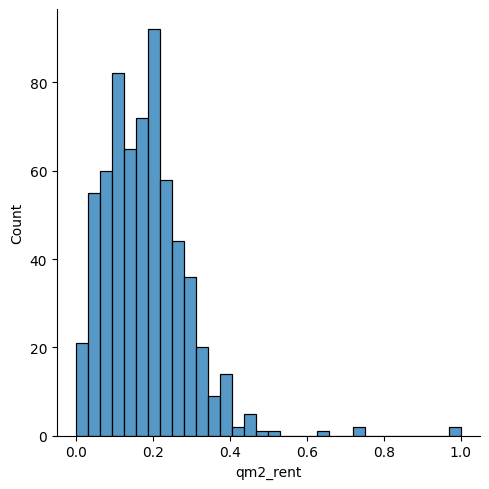

In [5]:
sns.displot(data, x="qm2_rent")

In [158]:
batch_size = int(round(len(X) * 0.01, 0))
batch_size = 30

model = Sequential()
model.add(Input(shape = X_train.shape[1]))

model.add(Dense(180, activation = 'relu'))
model.add(Dense(180, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))


optimizer = keras.optimizers.Adam(lr=0.01)
loss = 'mse'
metrics = ['mae']
# For regression MSE or MAE are good loss functions
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

model.fit(X_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (X_test, y_test))

# Change learning rate to 0.001 and train for 10 more epochs
K.set_value(model.optimizer.learning_rate, 0.0001)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

model.fit(X_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (X_test, y_test))

model.save(r'C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\nn\Sachsen-Anhalt_Model.h5')


#del model

#from keras.models import load_model

#model = load_model(r'C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\nn\Sachsen-Anhalt_Model.h5')

Learning rate before first fit: 0.01
Epoch 1/10
167/167 [==============================] - 1s 4ms/step - loss: 0.0726 - mae: 0.0581 - val_loss: 0.0011 - val_mae: 0.0245
Epoch 2/10
167/167 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0226 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 3/10
167/167 [==============================] - 1s 3ms/step - loss: 9.4119e-04 - mae: 0.0212 - val_loss: 0.0011 - val_mae: 0.0240
Epoch 4/10
167/167 [==============================] - 1s 3ms/step - loss: 8.7832e-04 - mae: 0.0208 - val_loss: 9.4264e-04 - val_mae: 0.0212
Epoch 5/10
167/167 [==============================] - 1s 3ms/step - loss: 8.3581e-04 - mae: 0.0204 - val_loss: 8.8866e-04 - val_mae: 0.0209
Epoch 6/10
167/167 [==============================] - 1s 3ms/step - loss: 7.6350e-04 - mae: 0.0199 - val_loss: 8.9171e-04 - val_mae: 0.0215
Epoch 7/10
167/167 [==============================] - 1s 3ms/step - loss: 6.7738e-04 - mae: 0.0190 - val_loss: 9.0187e-04 - val_mae: 0.0205
Epo

In [159]:
predictions = model.predict(X_test)

errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]
count_good_predictions = sum(1 for i in errors if i <= 10)
good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
good_predictions

39/39 [==============================] - 0s 2ms/step


38.49

### LR Range test

In [111]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from keras_lr_finder import LRFinder

# Model configuration
batch_size = int(round(len(X) * 0.01, 0))
loss_function = "mse"
metrics = ["mse"]
no_epochs = 100
start_lr = 0.00001
end_lr = 1
moving_average = 50

# Determine shape of the data
input_shape = X_train.shape[1]

# Initialize model
model = Sequential()
model.add(Input(shape = input_shape))
model.add(Dense(180, activation = 'relu'))
model.add(Dense(180, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [112]:
# Determine tests you want to perform
tests = [
  (Adam(), 'Adam optimizer'),
]

In [113]:
# Set containers for tests
test_learning_rates = []
test_losses = []
test_loss_changes = []
labels = []

In [114]:
# Perform each test
for test_optimizer, label in tests:

  # Compile the model
  model.compile(loss = loss_function,
                optimizer = test_optimizer,
                metrics = metrics)

  # Instantiate the Learning Rate Range Test / LR Finder
  lr_finder = LRFinder(model)

  # Perform the Learning Rate Range Test
  outputs = lr_finder.find(X_train, y_train, start_lr = start_lr, end_lr = end_lr, batch_size = batch_size, epochs = no_epochs)

Epoch 1/100
81/81 [==============================] - 2s 5ms/step - loss: 0.0156 - mse: 0.0156
Epoch 2/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - mse: 0.0093
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 9/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 11/100
81/81 [==============================] - 0s 3m

In [115]:
# Get values
learning_rates  = lr_finder.lrs
losses          = lr_finder.losses
loss_changes = []

# Compute smoothed loss changes
for i in range(moving_average, len(learning_rates)):
    loss_changes.append((losses[i] - losses[i - moving_average]) / moving_average)

# Append values to container
test_learning_rates.append(learning_rates)
test_losses.append(losses)
test_loss_changes.append(loss_changes)
labels.append(label)

In [120]:
min(test_loss_changes)

[-0.00015575297176837922,
 -0.00027158625423908235,
 -0.0002619795873761177,
 -0.0002252170443534851,
 -0.00023502960801124572,
 -0.00021742798388004302,
 -0.00022668629884719848,
 -0.00021586254239082338,
 -0.00021348707377910614,
 -0.00021203313022851944,
 -0.000197557732462883,
 -0.000186782106757164,
 -0.00017964761704206467,
 -0.00016920100897550584,
 -0.00016512099653482438,
 -0.00016645796597003937,
 -0.00017956562340259552,
 -0.0001673584058880806,
 -0.00016217324882745744,
 -0.00016243860125541687,
 -0.0001551320031285286,
 -0.00014759484678506852,
 -0.00014083590358495712,
 -0.00013310100883245468,
 -0.0001304876431822777,
 -0.00012412004172801972,
 -0.00012003961950540542,
 -0.00011656709015369416,
 -0.00011215370148420333,
 -0.0001087891310453415,
 -0.00010570596903562546,
 -0.00023953957483172417,
 -0.0001991577073931694,
 -0.00021038133651018142,
 -0.0002153829298913479,
 -0.00020917752757668496,
 -0.0002114470675587654,
 -0.00019911525771021843,
 -0.00020466245710849763,

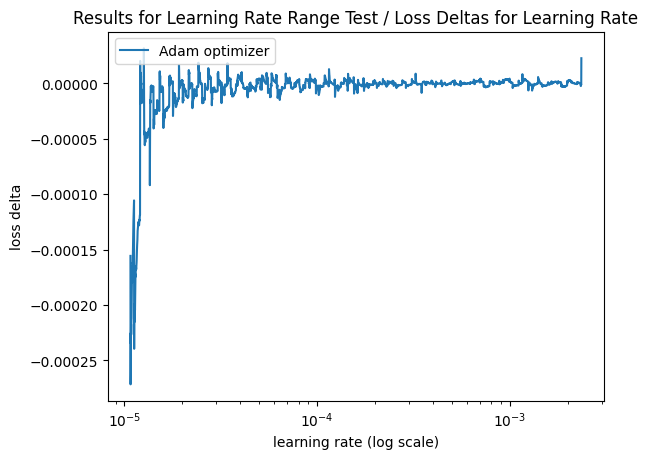

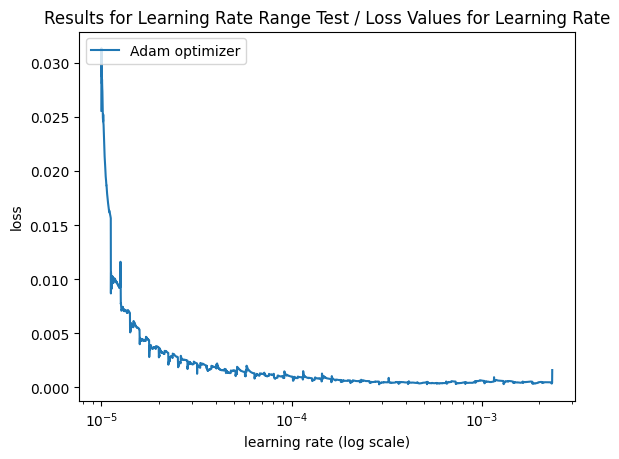

In [116]:
# Generate plot for Loss Deltas
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i][moving_average:], test_loss_changes[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss delta')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Deltas for Learning Rate')
plt.show()

# Generate plot for Loss Values
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i], test_losses[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Values for Learning Rate')
plt.show()

### Andere Methode LR range test zu machen https://github.com/surmenok/keras_lr_finder

In [56]:
optimizer = keras.optimizers.Adam(lr=0.01)
loss = 'mae'
metrics = ['mape']
# For regression MSE or MAE are good loss functions
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

# model is a Keras model
lr_finder = LRFinder(model)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(X_train, y_train, start_lr=0.0001, end_lr=1, batch_size=512, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0827 - mape: 16253.6475
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0508 - mape: 16445.3262
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0529 - mape: 9271.9199
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0307 - mape: 18303.6797
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0483 - mape: 41365.4570


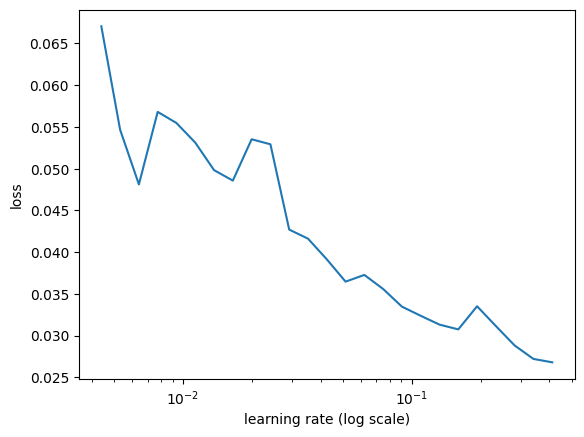

In [57]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

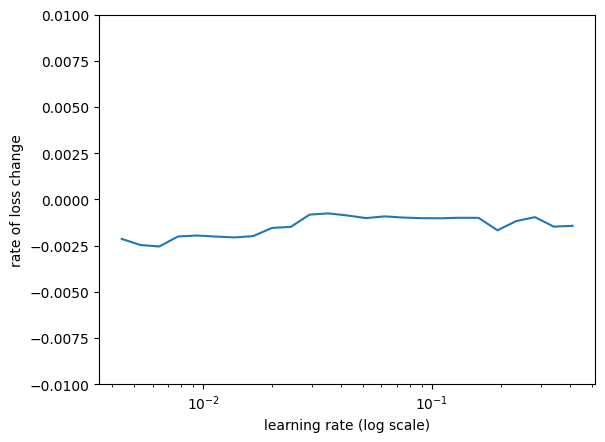

In [58]:
# Plot rate of change of the loss
# Ignore 20 batches in the beginning and 5 in the end
# Smooth the curve using simple moving average of 20 batches
# Limit the range for y axis to (-0.02, 0.01)
lr_finder.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.01, 0.01))